# Summary

Evaluate whether the fundamental function $\mathcal{F}$ obeys the triangular inequality (subadditivity): if not, we're dealing with a semimetric space. See, e.g., http://wiki.gis.com/wiki/index.php/Metric_(mathematics). 

Note that the term "pseudometric" may also apply, although according to this linked article it applies instead to distance functions that can be zero even if the points in question are not coincident.

### Parameter files

In [1]:
# Specify the parameter files for the job
import os
if 'GME_NB_PR' not in os.environ.keys():
    pr_filenames = ['TriangleInequality_sinbeta_eta1p5']
    # pr_filenames = ['TriangleInequality_sinbeta_eta0p5']
else:
    pr_filenames = eval(os.environ['GME_NB_PR'])

### Logging

In [2]:
from importlib import reload
import logging
reload(logging)
logging.basicConfig(level=logging.INFO, format=f'%(message)s')

### Modules

In [3]:
# Import Numpy
import numpy as np

# Import SymPy and set up latex inline & pretty dict printing
from sympy import (
    Eq,
    lambdify,
    sin,
    cos,
    atan,
    Rational,
    sqrt,
    solve,
    N,
    im,
    init_printing,
    trigsimp,
    re,
)

# Set up latex inline printing
init_printing(use_unicode=True, pretty_print=True, wrap_line=True)

# Pretty dict printing etc
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4).pprint

# Import Geomorphysics library functions, classes
from gmplib.utils import e2d
from gmplib.save import create_directories, export_plots
from gmplib.parameters import import_parameters, Parameters

# Import GME classes and do a wildcard (!) import of all GME symbol definitions
from gme.core.symbols import *
from gme.core.equations import Equations
from gme.plot.triangle_inequality import TriangleInequality

# Decide where we're working and thus where to find the job parameter files
#   -  use the GME_WORKING_PATH environment variable if it's defined
#   -  otherwise, deduce that we're working in the GME notebook dir
if "GME_WORKING_PATH" in os.environ.keys():
    working_path = os.environ["GME_WORKING_PATH"]
    print(
        f"Fetching working path from environment variable GME_WORKING_PATH = {working_path}"
    )
else:
    from gmplib.utils import get_pkg_path
    import gme

    working_path = get_pkg_path(gme)
    print(f"Deducing working path from GME package location = {working_path}")
    del gme

# Set the path to the parameter files for this nb and report
pr_path = os.path.join(working_path, "Parameters", "Theory")
pr_path, pr_filenames


Deducing working path from GME package location = /Users/colinstark/Projects/GME


('/Users/colinstark/Projects/GME/Parameters/Theory',
 ['TriangleInequality_sinbeta_eta1p5'])

### Parameter parsing

In [4]:
parameters_dict,_ = import_parameters(pr_path, [os.path.join('..','defaults'), *pr_filenames])
evaluations = {}
evaluations_sequence = ()
pr = Parameters(parameters_dict, evaluations=evaluations, sequence=evaluations_sequence)
[pp(psubobj.__dict__) for psubobj in (pr.job, pr.model, pr.solve, pr.resolve, pr.plot, pr.save)];

gmplib.parameters.read_json_file: /Users/colinstark/Projects/GME/Parameters/defaults.json
gmplib.parameters.read_json_file: /Users/colinstark/Projects/GME/Parameters/Theory/TriangleInequality_sinbeta_eta1p5.json
gmplib.parameters.ParametersNestedGroup: p.job
gmplib.parameters.ParametersNestedGroup: p.model
gmplib.parameters.ParametersNestedGroup: p.solve
gmplib.parameters.ParametersNestedGroup: p.resolve
gmplib.parameters.ParametersNestedGroup: p.plot
gmplib.parameters.ParametersNestedGroup: p.save


{   'debug': False,
    'group_name': 'Theory',
    'short_name': 'triangle_inequality',
    'subtitle': '',
    'title': 'Triangle inequality testing, eta=3/2, sin(beta) xi model',
    'verbose': True,
    'very_verbose': False}
{   'Ci': pi/45,
    'Lc': 10000,
    'beta_type': 'sin',
    'do_geodesic': False,
    'eta': 3/2,
    'h_0': 1/2,
    'ibc_type': 'concave-up',
    'kappa_h': 3/2,
    'mu': 1/4,
    't_xiv0_list': None,
    'varepsilonhat': 1/100,
    'varphi_0': 2.641e-05,
    'varphi_type': 'ramp',
    'x_h': 1,
    'x_sigma': 0.01,
    'xiv_0': None}
{   'choice': 'Hamilton',
    'do_dense': True,
    'do_geodesic': True,
    'do_ic': False,
    'do_ip': False,
    'do_vb': False,
    'ic_res': 31,
    'ip_res': 101,
    'method': {   'Hamilton': 'DOP853',
                  'choices': ['RK45', 'RK23', 'Radau', 'DOP853', 'LSODA'],
                  'geodesic': 'LSODA'},
    'ray_n_t': 301,
    't_distribn': 2,
    't_end': 0.01,
    'vb_res': 101}
{   'do_eliminate_causti

In [5]:
subexp = {
    eta: pr.model.eta,
    mu: pr.model.mu
}
sub = {
        Ci: pr.model.Ci, 
        Lc: pr.model.Lc, 
        varepsilonhat: pr.model.varepsilonhat, 
        varphi_0: pr.model.varphi_0,
        xiv_0: pr.model.xiv_0,
#         kappa_h: pr.model.kappa_h,
#         h_0: pr.model.h_0,
#         x_sigma: pr.model.x_sigma,
#         x_h: pr.model.x_h
}


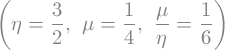

In [6]:
Eq(eta,pr.model.eta), Eq(mu,pr.model.mu), Eq(mu/eta,pr.model.mu/pr.model.eta)

In [7]:
sub

{\mathsf{Ci}: pi/45,
 L_\mathrm{c}: 10000,
 \hat{\varepsilon}: 1/100,
 \varphi_0: 2.641e-05,
 \xi^{\downarrow_{0}}: None}

# Theory

### Basics

In [8]:
gmeq = Equations( eta_=pr.model.eta, 
                  mu_=pr.model.mu, 
                  beta_type=pr.model.beta_type, 
                  varphi_type=pr.model.varphi_type, 
#                   ibc_type=pr.model.ibc_type,
                  parameters=sub, 
                  do_raw=False )

gme.core.equations.Equations
gme.core.equations.EquationsMixedIn
gme.core.equations.EquationsBase
gme.core.rp.define_p_eqns
gme.core.rp.define_r_eqns
gme.core.xi.define_xi_eqns
gme.core.xi.define_xi_model_eqn
gme.core.xi.define_xi_related_eqns
gme.core.varphi.define_varphi_model_eqns
gme.core.varphi.define_varphi_related_eqns
gme.core.fundamental.define_Fstar_eqns
gme.core.fundamental.define_H_eqns
gme.core.hamiltons.define_rdot_eqns
gme.core.hamiltons.define_pdot_eqns
gme.core.hamiltons.define_Hamiltons_eqns
gme.core.ndim.nondimensionalize
gme.core.ndim.define_nodimensionalized_Hamiltons_eqns
gme.core.profile.define_z_eqns
gme.core.angles.define_tanalpha_eqns
gme.core.angles.define_tanbeta_eqns
gme.core.angles.define_psi_eqns
gme.core.metrictensor.define_g_eqns
gme.core.pxpoly.define_px_poly_eqn (ndim=False)
gme.core.pxpoly.define_px_poly_eqn (ndim=True)


In [9]:
prefix = ('_').join([pr.job.short_name, gmeq.beta_type+'beta'])
# prefix = ('_').join([pr.job.short_name, gmeq.beta_type+'beta', gmeq.varphi_type.replace('-','')])

suffix = f'_eta{float(N(gmeq.eta_))}'
# suffix += f'_ratio{ float(sy.N(gmeq.mu/gmeq.eta)):0.2f}' if gmeq.mu/gmeq.eta==Rational(1,3) \
#                                     else f'_ratio{ float(sy.N(gmeq.mu/gmeq.eta)):0.1f}'
# suffix += f'_xiv{float(sy.N(pr.model.xiv_0)):1.0f}'
# suffix = (suffix if pr.model.varphi_type=='ramp' \
#             else suffix+f'_xh{float(gmes.parameters[x_h]):1.1f}').replace('.','p')

job_name = prefix+suffix.replace('.','p')
job_name

'triangle_inequality_sinbeta_eta1p5'

### Lagrangian & related

In [10]:
import sympy as sy
s = sy.symbols(r's',  real=True)
vx = sy.symbols(r'x',  real=True)
vz = sy.symbols(r'z',  real=True)
v = sy.symbols(r'v',  real=True, positive=True)

Grab closed-form Lagrangian for $\eta=1/2$ and $\alpha<\alpha_{\mathrm{ext}}$.

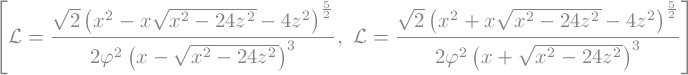

In [11]:
if gmeq.eta_==Rational(1,2):
    L_compact_eqn = Eq(L, 
        -s*(sqrt(2)*(vx**2-s*vx*sqrt(vx**2-8*vz**2)+4*vz**2)**Rational(3,2)
            /(4*varphi**2*(-s*vx+sqrt(vx**2-8*vz**2)))) 
    )
elif gmeq.eta_==Rational(3,2):
    L_compact_eqn = Eq(L, 
        (sqrt(2)*(vx**2-s*vx*sqrt(vx**2-24*vz**2)-4*vz**2)**Rational(5,2)
            /(2*varphi**2*(vx-s*sqrt(vx**2-24*vz**2))**3)) 
    )
else:
    print("Not implemented")
    
L_compact_eqns = [
    L_compact_eqn.subs({s:s_}) for s_ in (+1,-1)
]
F_compact_eqns = [
    Eq(F, (sqrt(L*2)).subs(e2d(L_compact_eqn_)))
    for L_compact_eqn_ in L_compact_eqns
]
del L_compact_eqn
L_compact_eqns

In [12]:
if gmeq.eta_==Rational(1,2):
    vx_,vz_ = 0.9,-0.2978
    px_,pz_ = 0.6630963505914919,-1.354973165538337
else:
    vx_,vz_ = 1.05462010732076, 0.214847320357639
    px_,pz_ = 1.15,-1.
varphi_ = 1

In [13]:
vx_,vz_, F_compact_eqns[1].rhs.subs({varphi:1, vx:vx_, vz:vz_}).n()

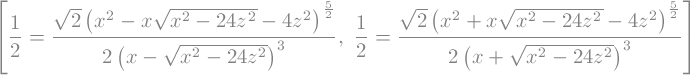

In [14]:
vx_vz_implicit_eqns = [
    L_compact_eqn_.subs({L:Rational(1,2), varphi:1})
    for L_compact_eqn_ in L_compact_eqns
]
vx_vz_implicit_eqns

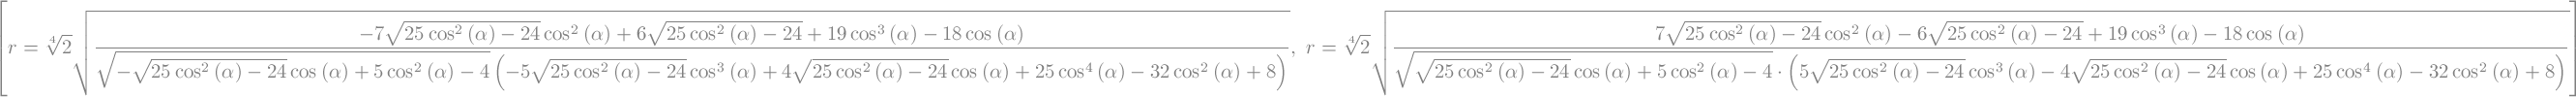

In [15]:
# eta= 3/2
if gmeq.eta_ == Rational(3, 2):
    v_alpha_eqns = [
        Eq(
            r,
            s_
            * solve(
                (
                    trigsimp(
                        vx_vz_implicit_eqn_.subs(
                            {vx: v * cos(alpha), vz: -v * sin(alpha)}
                        )
                    ).subs({sin(alpha) ** 2: 1 - cos(alpha) ** 2})
                ),
                v,
            )[0],
        )
        for (vx_vz_implicit_eqn_, s_) in zip(vx_vz_implicit_eqns, (+1, -1))
    ]
elif gmeq.eta_ == Rational(1, 2):
    v_alpha_eqns = [
        Eq(
            r,
            (
                solve(
                    (
                        trigsimp(
                            vx_vz_implicit_eqn_.subs(
                                {vx: v * cos(alpha), vz: -v * sin(alpha)}
                            )
                        ).subs({sin(alpha) ** 2: 1 - cos(alpha) ** 2})
                    ),
                    v,
                )[i_]
            ),
        )
        for i_, (vx_vz_implicit_eqn_, s_) in enumerate(
            zip(vx_vz_implicit_eqns, (+1, -1))
        )
    ]
else:
    print("Not implemented")
v_alpha_eqns


In [16]:
[
    ( v_alpha_eqn_.rhs.subs({alpha:sy.rad(0.1)}).n() )
    for v_alpha_eqn_ in v_alpha_eqns
]

In [17]:
v_alpha_lambdifieds = [
    lambdify((alpha), v_alpha_eqn_)
    for v_alpha_eqn_ in v_alpha_eqns
]
v_alpha_lambdas = [
    lambda alpha_: v_alpha_lambdified_(alpha_)
    for v_alpha_lambdified_ in v_alpha_lambdifieds
]

# Explore distance function

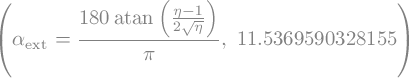

In [18]:
alpha_ext_eqn = Eq( alpha_ext, (sy.deg(atan( (eta-1)/(2*sqrt(eta))) )) )
gmeq.alpha_ext_eqn = alpha_ext_eqn
alpha_ext_eqn, float(gmeq.alpha_ext_eqn.rhs.subs({eta: gmeq.eta_}).n())

In [19]:
v_alpha_eqn_ = v_alpha_eqns[0]

In [20]:
v_alpha_eqn_.rhs.subs({alpha:-0.1}).n()

In [118]:
# n_alpha1_ = 6
# n_alpha1_ = 22
# n_alpha1_ = 42
n_alpha1_ = 42+40
n_delta1_ = n_alpha1_ - 1

verbose = False

if gmeq.eta_==Rational(1,2):
    s_ = -1
elif gmeq.eta_==Rational(3,2):
    s_ = +1
else:
    print("Not implemented")

alpha_ext_ = np.deg2rad(
    float(gmeq.alpha_ext_eqn.rhs.subs({eta: gmeq.eta_}).n())
)
if gmeq.eta_==Rational(1,2):
    alpha0_array = np.deg2rad(np.array([-5, -10, -15]))
elif gmeq.eta_==Rational(3,2):
    # alpha0_array = np.deg2rad(np.array([5, 8, 11]))
    # alpha0_array = np.deg2rad(np.array([3, 6, 9]))
    alpha0_array = np.deg2rad(np.array([2, 6, 10]))
    # alpha0_array = np.deg2rad(np.array([5]))
else:
    print("Not implemented")
f_alpha0_array = alpha0_array / alpha_ext_


ndelta_t12_grids = {}
alpha1_arrays = {}
ndelta_t1_arrays = {}

do_check = False

# Select the reference ray angle
# Note: all alpha0 values are negative
for alpha0_ in alpha0_array[:]:
    print(f"alpha0 = {np.rad2deg(alpha0_):.2f}º", flush=True)
    # Get the velocity in this direction
    v0_ = float(re(v_alpha_eqn_.rhs.subs({alpha: alpha0_}).n()))
    # Specify unit distance along the reference ray
    r0_ = 1
    # Calculate time elapsed to cover this unit distance
    delta_t0_ = r0_ / v0_
    # Compute the reference ray vector components
    rx0_ = r0_ * np.cos(alpha0_)
    rz0_ = r0_ * np.sin(alpha0_)
    if verbose: print(rx0_,rz0_)

    # Select the first subray angle
    # Note: for eta==1/2, alpha_ext is negative, 
    # so all the alpha1 values are negative
    raw_alpha1_array_ = np.linspace(0, s_*20, n_alpha1_ - 1)
    raw_alpha1_array_ = raw_alpha1_array_[
        np.abs(raw_alpha1_array_) < np.abs(np.rad2deg(alpha_ext_))
    ]
    raw_alpha1_array_ = np.concatenate(
        [raw_alpha1_array_, np.array([np.rad2deg(alpha_ext_)])]
    )
    alpha1_arrays[alpha0_] = np.deg2rad(raw_alpha1_array_)
    # print("alpha1_arrays", alpha1_arrays[alpha0_])

    ndelta_t1_arrays[alpha0_] = np.linspace(0, 2, n_delta1_)
    ndelta_t12_grids[alpha0_] = np.zeros(
        (
            np.shape(alpha1_arrays[alpha0_])[0],
            np.shape(ndelta_t1_arrays[alpha0_])[0],
        )
    )

    for i_alpha1_, alpha1_ in enumerate(alpha1_arrays[alpha0_]):
        # print(alpha1_)
        # alpha1_ = alpha0_
        if n_alpha1_ <= 5:
            if verbose: print(f"\talpha1 = {np.rad2deg(alpha1_):.2f}º", flush=True)
        # Select the time elapsed along the first subray
        for i_delta1_, ndelta_t1_ in enumerate(ndelta_t1_arrays[alpha0_]):
            delta_t1_ = delta_t0_ * ndelta_t1_
            if n_alpha1_ <= 5:
                if verbose: print(f"\tndelta_t1_ = {ndelta_t1_:.3f}", flush=True)
            # Get the velocity in this direction
            v1_raw_ = v_alpha_eqn_.rhs.subs({alpha: alpha1_}).n()
            if verbose: print(f"alpha1_ = {alpha1_}")
            if im(v1_raw_) == 0:
                v1_ = float(v1_raw_)
            else:
                # print(f"error:  alpha1_={alpha1_}  v1_raw_={v1_raw_}")
                v1_ = np.nan
            if verbose: print(f"v1_raw_ = {v1_raw_}")
            # Calculate the distance covered along this subray
            # given the specified time
            r1_ = v1_ * delta_t1_
            # Compute the vector components of this subray
            rx1_ = r1_ * np.cos(alpha1_)
            rz1_ = r1_ * np.sin(alpha1_)

            # Compute second subray vector needed to match the reference ray
            rx2_ = rx0_ - rx1_
            rz2_ = rz0_ - rz1_
            # print(rz0_,rz1_,rz2_)
            r2_ = np.sqrt(rx2_ ** 2 + rz2_ ** 2)
            alpha2_ = np.arctan(rz2_ / rx2_)
            # Get the velocity in this direction
            v2_raw_ = v_alpha_eqn_.rhs.subs({alpha: alpha2_}).n()
            if verbose: print(f"v1_raw_ = {v1_raw_}")
            if verbose: print(f"v2_raw_ = {v2_raw_}")
            if verbose: print("rx2 etc", rx2_,rz2_,r2_,alpha2_)
            if (
                im(v2_raw_) == 0
                and np.abs(alpha2_) < np.abs(alpha_ext_)
                and np.sign(alpha2_)== s_
                and rx2_ > 0
                and s_*rz2_ > 0
                # and (rx2_ > 0 and s_*rz2_ < 0)
                # and not np.isnan(v1_)
            ):
                v2_ = float(v2_raw_)
                # Calculate the travel time to cover this subray distance
                # given the speed
                # if rz2_ > 0:
                #     print("r2: ", rx2_, rz2_, alpha2_)
                delta_t2_ = r2_ / v2_
                if do_check:
                    r12_check_ = delta_t1_ * np.array(
                        [v1_ * np.cos(alpha1_), v1_ * np.sin(alpha1_)]
                    ) + delta_t2_ * np.array(
                        [v2_ * np.cos(alpha2_), v2_ * np.sin(alpha2_)]
                    )
                    r0_check_ = delta_t0_ * np.array(
                        [v0_ * np.cos(alpha0_), v0_ * np.sin(alpha0_)]
                    )
                    if (
                        np.round(r12_check_, 5)[0] != np.round(r0_check_, 5)[0]
                        or 
                        np.round(r12_check_, 5)[1] != np.round(r0_check_, 5)[1]
                    ):
                        if n_alpha1_ <= 5:
                            print("r0 & r12 mismatch")
                            print(v1_, v2_)
                            print(rx0_, rx1_, rx2_, rx1_ + rx2_)
                            print(rz0_, rz1_, rz2_, rz1_ + rz2_)
                        v2_ = 0
                        delta_t2_ = np.nan
            else:
                v2_ = 0
                delta_t2_ = np.nan

            # Calculate the travel time along the subray path
            delta_t12_ = delta_t1_ + delta_t2_

            # Record
            ndelta_t12_grids[alpha0_][i_alpha1_, i_delta1_] = (
                delta_t12_ / delta_t0_
            )
            if n_alpha1_ <= 5 and alpha0_ == alpha1_:
                print(
                    "\talphas:",
                    np.round(
                        np.rad2deg(
                            np.array(
                                [
                                    alpha0_,
                                    alpha1_,
                                    alpha2_,
                                ]
                            )
                        ),
                        3,
                    ),
                    "\tdelta_ts:",
                    np.round(
                        np.array(
                            [
                                # delta_t0_,
                                delta_t1_ / delta_t0_,
                                delta_t2_ / delta_t0_,
                                delta_t12_ / delta_t0_,
                            ]
                        ),
                        3,
                    ),
                )
                # print(
                #     "\t",
                #     np.round(np.rad2deg(alpha1_), 3),
                #     np.round(delta_t1_, 3),
                #     np.round(delta_t12_ / delta_t0_, 3),
                # )

alpha0 = 2.00º
alpha0 = 6.00º
alpha0 = 10.00º


# Plots

In [119]:
gr = TriangleInequality(gmeq)

gmplib.plot.GraphingBase:
   Creating plot: triangle_inequality_sinbeta_eta1p5_falpha0p22 size=(6, 6) @ 100 dpi
gmplib.plot.GraphingBase:
   Creating plot: triangle_inequality_sinbeta_eta1p5_falpha0p57 size=(6, 6) @ 100 dpi
gmplib.plot.GraphingBase:
   Creating plot: triangle_inequality_sinbeta_eta1p5_falpha0p92 size=(6, 6) @ 100 dpi


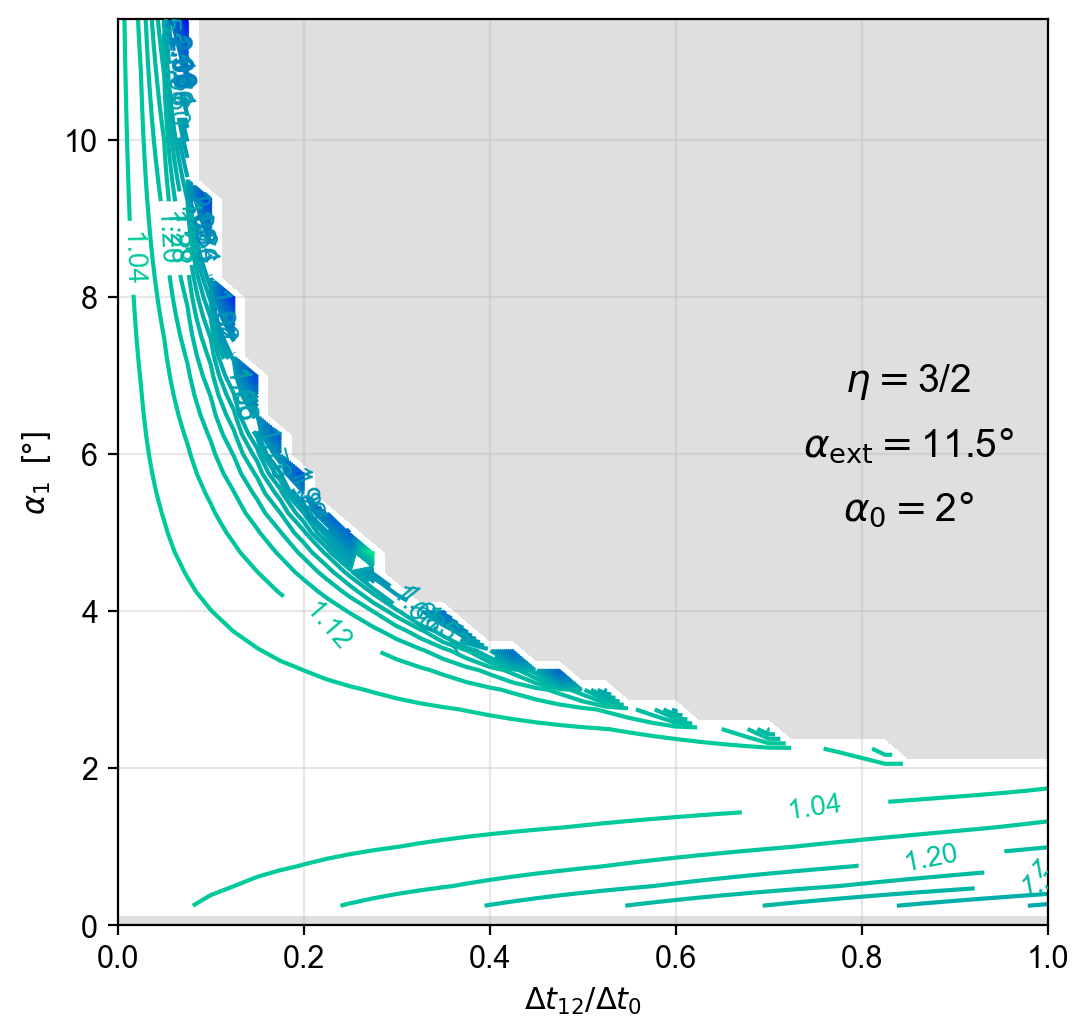

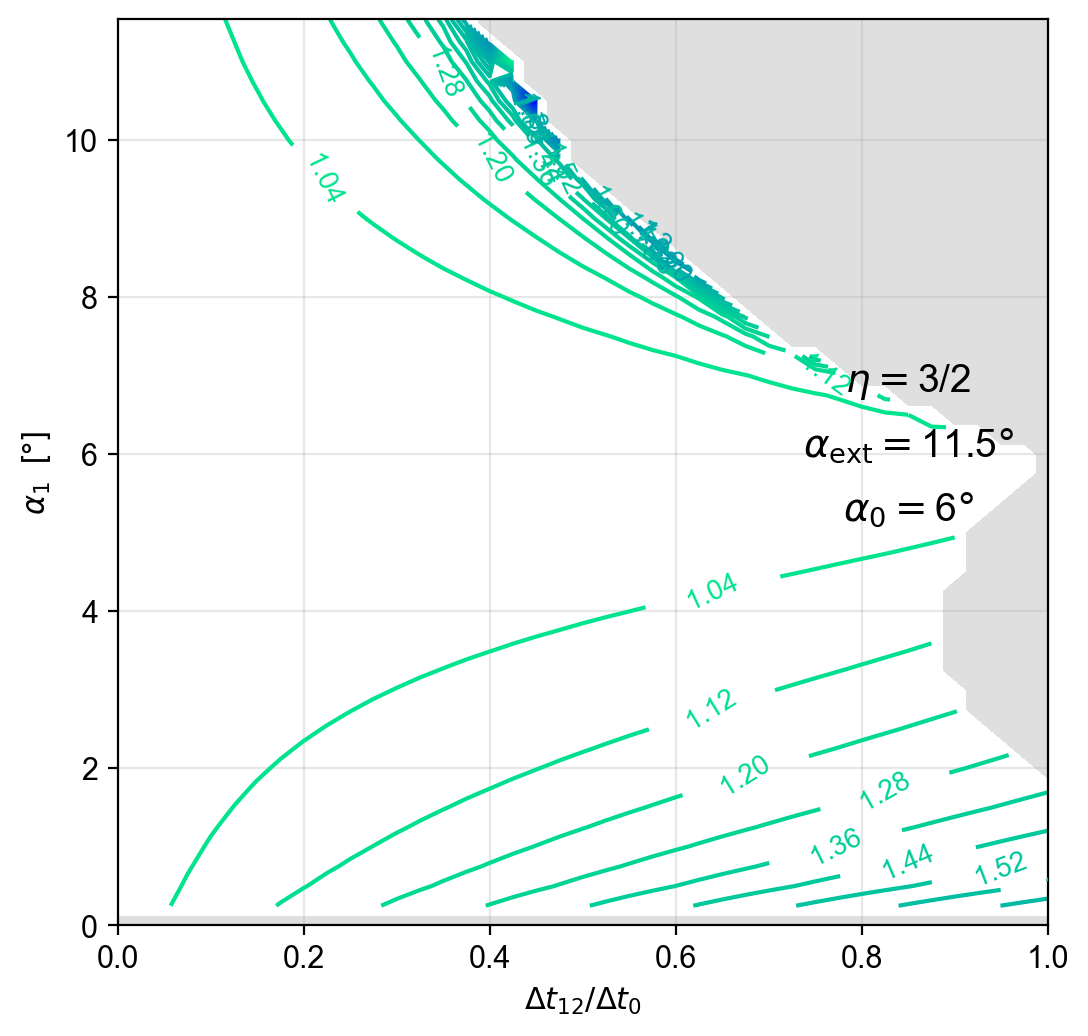

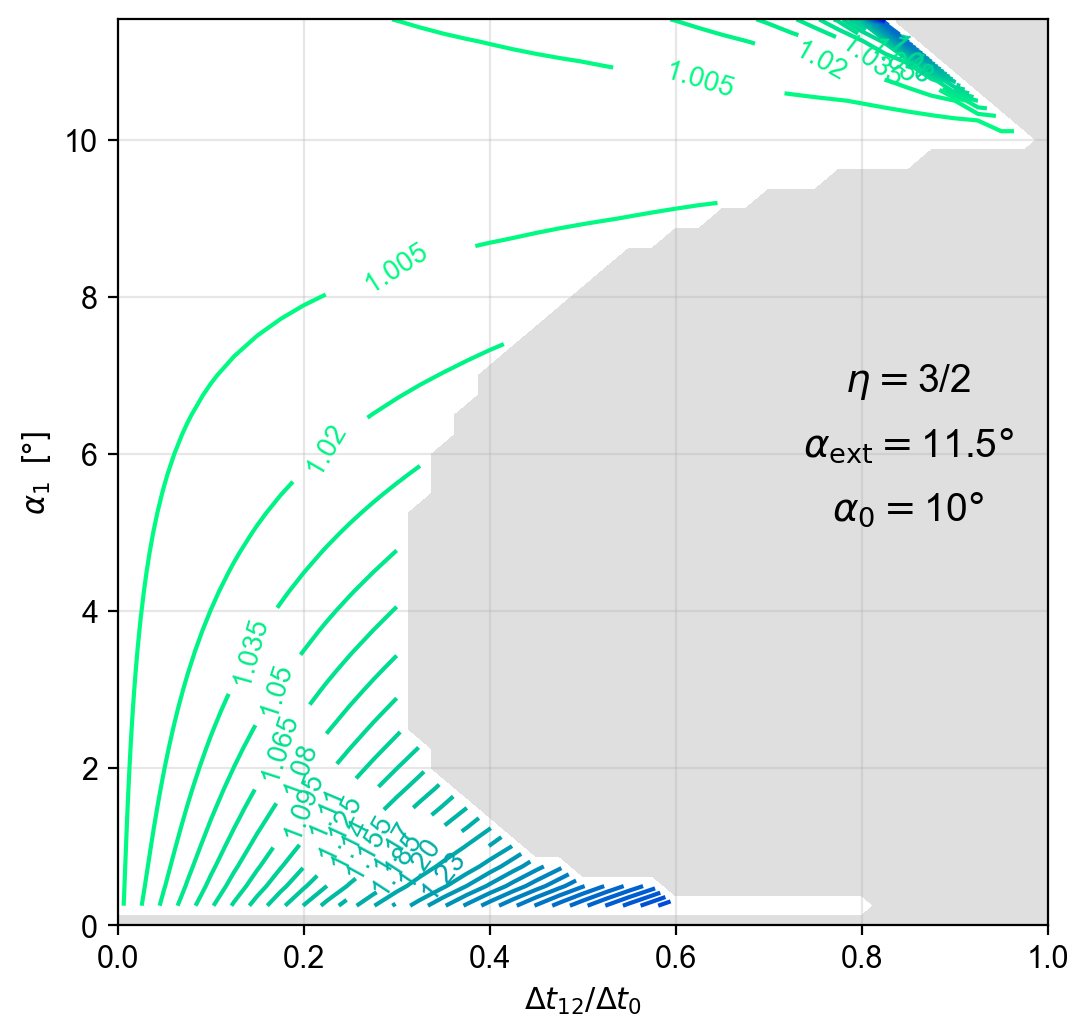

In [120]:
gr.contoured_delta_t12(
    job_name,
    alpha1_arrays,
    ndelta_t1_arrays,
    ndelta_t12_grids,
    alpha0_array,
    fig_size=(6, 6),
)

# Save

In [121]:
pp(gr.fdict)

{   'triangle_inequality_sinbeta_eta1p5_falpha0p22': <Figure size 600x600 with 1 Axes>,
    'triangle_inequality_sinbeta_eta1p5_falpha0p57': <Figure size 600x600 with 1 Axes>,
    'triangle_inequality_sinbeta_eta1p5_falpha0p92': <Figure size 600x600 with 1 Axes>}


In [122]:
plots_dir = create_directories(pr.save.figs_path, pr.job.group_name)
export_plots( gr.fdict, plots_dir, pr.save.figs_format, suffix='' )

gmplib.save.export_plots:
   Writing to dir: "/Users/colinstark/Projects/GME/Plots/Theory"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p22.jpg"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p57.jpg"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p92.jpg"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p22.pdf"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p57.pdf"
gmplib.save.export_plot: Exported "triangle_inequality_sinbeta_eta1p5_falpha0p92.pdf"
